In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE , mean_squared_error as MSE , r2_score 
import pickle

In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('C:\\Users\\admin\\Desktop\\Walmart.csv')

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [10]:
df['Week'] =df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

C:\Users\admin\AppData\Local\Temp\ipykernel_9908\3394850293.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] =df['Date'].dt.week


In [11]:
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
2186,16,2010-11-19,458634.68,0,27.26,2.758,191.031217,6.986,46,11,2010
6420,45,2012-07-20,737613.65,0,78.89,3.567,191.167043,8.684,29,7,2012
3319,24,2010-09-03,1366381.60,0,73.52,2.860,132.724839,8.117,35,9,2010
4081,29,2011-07-29,474653.06,0,75.32,3.898,135.963935,9.863,30,7,2011
3525,25,2011-11-18,728525.60,0,46.41,3.530,211.184721,7.082,46,11,2011


Text(0.5, 1.0, 'Correlation Matrix')

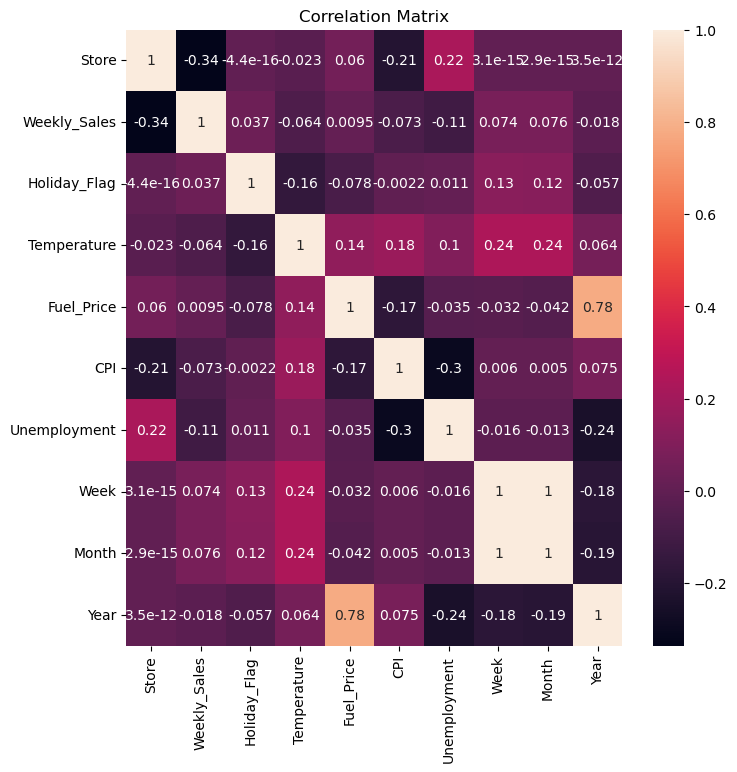

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

In [13]:
num_features = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

In [14]:
X =df.drop(columns = ['Date' , 'Fuel_Price']) 
y = df['Fuel_Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [16]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10)
  
xgb_r.fit(X_train, y_train)
  
pred = xgb_r.predict(X_test)
  
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
r2 = r2_score(y_test, pred)
print("r2 score : % f" %(r2))
mae = MAE(y_test, pred)
print("MAE : % f" %(mae))
mse = MSE(y_test, pred)
print("MSE : % f" %(mse))

RMSE :  0.120167
r2 score :  0.932150
MAE :  0.092258
MSE :  0.014440


In [17]:
filename = 'fuelprice_model.pkl'
pickle.dump(xgb_r,open(filename,'wb'))


In [18]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9321496451991222


In [19]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_r = AdaBoostRegressor(n_estimators = 50 , base_estimator = DecisionTreeRegressor() , learning_rate = 1)

ada_r.fit(X_train,y_train)

pred_ada = ada_r.predict(X_test)

rmse = np.sqrt(MSE(y_test, pred_ada))
print("RMSE : % f" %(rmse))
r2 = r2_score(y_test, pred_ada)
print("r2 score : % f" %(r2))
mae = MAE(y_test, pred_ada)
print("MAE : % f" %(mae))
mse = MSE(y_test, pred_ada)
print("MSE : % f" %(mse))

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


RMSE :  0.030098
r2 score :  0.995743
MAE :  0.014492
MSE :  0.000906


In [20]:
filename = 'fuelprice_ada_model.pkl'
pickle.dump(ada_r,open(filename,'wb'))


In [21]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.995743353521847


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor(n_estimators = 50 , random_state = 0)

rf_r.fit(X_train,y_train)
pred_rf = rf_r.predict(X_test)

rmse = np.sqrt(MSE(y_test, pred_rf))
print("RMSE : % f" %(rmse))
r2 = r2_score(y_test, pred_rf)
print("r2 score : % f" %(r2))
mae = MAE(y_test, pred_rf)
print("MAE : % f" %(mae))
mse = MSE(y_test, pred_rf)
print("MSE : % f" %(mse))

RMSE :  0.040760
r2 score :  0.992194
MAE :  0.024466
MSE :  0.001661


In [23]:
filename = 'fuelprice_rf_model.pkl'
pickle.dump(rf_r,open(filename,'wb'))

In [30]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.9921935233327492


In [25]:
df = df.drop(columns = 'Date')

In [26]:
df.to_csv('C:\\Users\\admin\\Desktop\\Walmart1.csv', index = False)

In [32]:
from pycaret.regression import *

In [33]:
loaded_model = load_model('best_regression_model')

Transformation Pipeline and Model Successfully Loaded


In [37]:
new_data = pd.read_csv('C:\\Users\\admin\\Desktop\\Walmart1.csv')
predictions = predict_model(loaded_model, data= new_data)

In [38]:
predictions

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,Week,Month,Year,Fuel_Price,prediction_label
0,1,1.643691e+06,0,42.310001,211.096359,8.106,5,2,2010,2.572,2.57200
1,1,1.641958e+06,1,38.509998,211.242172,8.106,6,2,2010,2.548,2.54800
2,1,1.611968e+06,0,39.930000,211.289139,8.106,7,2,2010,2.514,2.51400
3,1,1.409728e+06,0,46.630001,211.319641,8.106,8,2,2010,2.561,2.56100
4,1,1.554807e+06,0,46.500000,211.350143,8.106,9,3,2010,2.625,2.62500
...,...,...,...,...,...,...,...,...,...,...,...
5918,45,7.131739e+05,0,64.879997,192.013565,8.684,39,9,2012,3.997,3.99700
5919,45,7.334551e+05,0,64.889999,192.170410,8.667,40,10,2012,3.985,3.98500
5920,45,7.344644e+05,0,54.470001,192.327271,8.667,41,10,2012,4.000,3.98164
5921,45,7.181255e+05,0,56.470001,192.330856,8.667,42,10,2012,3.969,3.94397


In [39]:
true_values = new_data['Fuel_Price']
predicted_values = predictions['prediction_label']

In [40]:
rmse = np.sqrt(MSE(true_values,predicted_values))
mae = MAE(true_values,predicted_values)
r2 = r2_score(true_values,predicted_values)
mse = MSE(true_values,predicted_values)

print("RMSE : % f" %(rmse))

print("r2 score : % f" %(r2))

print("MAE : % f" %(mae))

print("MSE : % f" %(mse))

RMSE :  0.021172
r2 score :  0.997863
MAE :  0.006367
MSE :  0.000448
